# Importing Libraries

In [4]:
import os

import numpy as np
from skimage import util, transform, filters, color, measure, morphology
from sklearn import model_selection, neighbors, metrics, preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### %matplotlib notebook
### %matplotlib widget

## Conjunto de dados

In [5]:
ds_path = 'mpeg7_mod'
print(ds_path)

mpeg7_mod


In [6]:
# Lista das pastas na pasta 'ds_path' (nomes das classes)
classes_list = os.listdir(ds_path)

# Lista com as imagens no dataset
image_list = []
# Lista com os rótulos das imagens
label_list = []

# Lista com os nomes das imagens
filename_list_ = []

# Percorre as classes do dataset
for classe in classes_list:

    # Listagem de todas as imagens na pasta daquela classe
    filename_list = os.listdir(os.path.join(ds_path, classe))

    # Percorre os arquivos na pasta atual
    for filename in filename_list:
        # Carrega a imagem
        img_temp = plt.imread(os.path.join(ds_path, classe, filename))

        # Redimensiona a imagem para 1/4 do tamanho original
        img_temp = transform.resize(img_temp, (img_temp.shape[0]//4, img_temp.shape[1]//4), anti_aliasing=True)

        # Adiciona a imagem a lista de imagens
        image_list.append(img_temp)

        # Adiciona o rótulo da imagem à lista de rótulos
        label_list.append(classe)

        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_.append(filename)

In [7]:
# Coverte para numpy array
label_list = np.array(label_list)
# Lista com os rótulos das imagens
print(label_list)

['apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat'
 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat'
 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 

In [8]:
# Seleciona apenas as primeiras N imagens de cada classe
image_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i, class_name in enumerate(classes_list):
    print(i, class_name)
    # As 6 primeiras ocorrencias em que em label_list igual a class_name.
    # Imagem.
    image_list_temp += [image_list[j] for j in np.where(label_list==class_name)[0][:6]]
    # Nome do arquivo.
    filename_list_temp += [filename_list_[j] for j in np.where(label_list==class_name)[0][:6]]

0 apple
1 bat
2 beetle
3 bell
4 bird
5 bone


In [9]:
for i, image in enumerate(image_list_temp):
    print(f"Imagem {i}: Mínimo = {image.min()}, Máximo = {image.max()}, Forma = {image.shape}")


Imagem 0: Mínimo = 0.0, Máximo = 1.0, Forma = (64, 64)
Imagem 1: Mínimo = 0.0, Máximo = 1.0, Forma = (64, 64)
Imagem 2: Mínimo = 0.0, Máximo = 1.0, Forma = (64, 64)
Imagem 3: Mínimo = 0.0, Máximo = 1.0, Forma = (64, 64)
Imagem 4: Mínimo = 0.0, Máximo = 1.0, Forma = (64, 64)
Imagem 5: Mínimo = 0.0, Máximo = 1.0, Forma = (64, 64)
Imagem 6: Mínimo = 0.0, Máximo = 1.0, Forma = (185, 86)
Imagem 7: Mínimo = 0.0, Máximo = 1.0, Forma = (185, 86)
Imagem 8: Mínimo = 0.0, Máximo = 1.0, Forma = (185, 86)
Imagem 9: Mínimo = 0.0, Máximo = 1.0, Forma = (185, 86)
Imagem 10: Mínimo = 0.0, Máximo = 1.0, Forma = (185, 86)
Imagem 11: Mínimo = 0.0, Máximo = 1.0, Forma = (197, 185)
Imagem 12: Mínimo = 0.0, Máximo = 1.0, Forma = (103, 104)
Imagem 13: Mínimo = 0.0, Máximo = 1.0, Forma = (103, 104)
Imagem 14: Mínimo = 0.0, Máximo = 1.0, Forma = (103, 104)
Imagem 15: Mínimo = 0.0, Máximo = 1.0, Forma = (103, 104)
Imagem 16: Mínimo = 0.0, Máximo = 1.0, Forma = (103, 104)
Imagem 17: Mínimo = 0.0, Máximo = 1.0, Fo

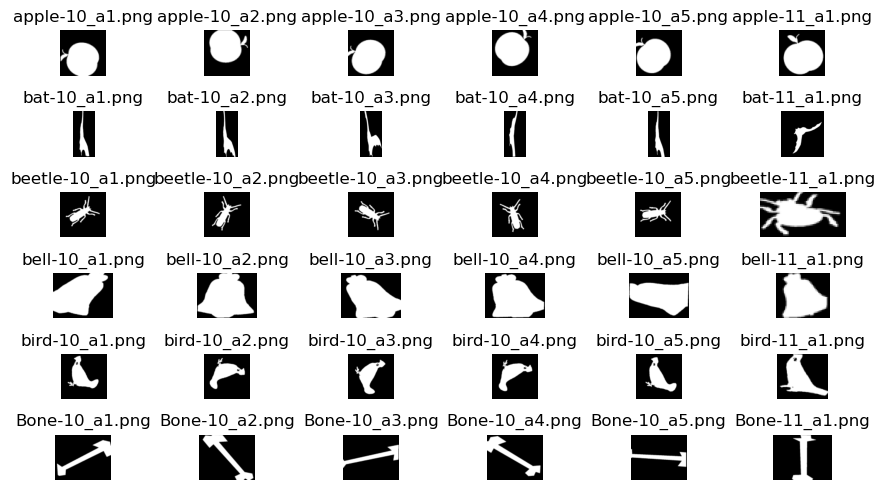

In [10]:
import matplotlib.pyplot as plt
import math

# Número de imagens
num_images = len(image_list_temp)

# Calcular as dimensões da grade
rows = math.ceil(num_images / 6)
cols = 6

# Criar a figura com grade ajustada
fig, ax = plt.subplots(rows, cols, figsize=(9, 5))

# Garantir que 'ax' seja bidimensional
if rows == 1:
    ax = ax[np.newaxis, :]  # Ajuste para uma única linha de subplots

# Iterar pelas imagens e títulos
for i, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    # Normalizar se necessário
    if image.max() > 1:  # Assumindo que já está na escala [0, 255]
        normalized_image = image
    else:  # Escala [0, 1]
        normalized_image = (image * 255).astype('uint8')

    # Plotar imagem
    ax[i // 6, i % 6].imshow(normalized_image, cmap='gray', vmin=0, vmax=255)
    ax[i // 6, i % 6].set_title(str(filename))
    ax[i // 6, i % 6].axis('off')  # Opcional: desativar os eixos

# Remover subplots vazios
for i in range(num_images, rows * cols):
    fig.delaxes(ax[i // 6, i % 6])

fig.tight_layout()
plt.show()


In [11]:
# Arranjo 2D com as características das imagens
# Cada linha armazena informações sobre uma imagem. Cada coluna armazena uma característica.
# [ [area, major_axis, minor_axis, solidity, eccentricity] ]
feature_mat = []

# Lista com as imagens segmentadas (binárias)
seg_list = image_list  # Assumindo que image_list já contém as imagens segmentadas

# Lista com os rótulos das imagens
list_label = []

for i, (seg_image, label) in enumerate(zip(seg_list, label_list)):
    # DEBUG
    print('Imagem {} - classe {}'.format(i, label))
    
    # Adiciona o rótulo (label) da imagem à lista
    list_label.append(label)
    
    # Calcula a imagem de rótulos
    im_lbl = measure.label(seg_image)
    
    # Calcula uma lista de propriedades (características) dos objetos na imagem
    props = measure.regionprops(im_lbl)
    
    # Verifica se há exatamente um objeto na imagem
    if len(props) != 1:
        print(f'ERRO de segmentação: {len(props)} objetos detectados.')
        continue

    # Extrai as propriedades do objeto
    for prop in props:
        # Prop. 0: Área
        area = prop.area
        # Prop. 1: Maior eixo
        major_axis = prop.major_axis_length
        # Prop. 2: Menor eixo
        minor_axis = prop.minor_axis_length
        # Prop. 3: Solidez
        solidity = prop.solidity
        # Prop. 4: Excentricidade
        eccentricity = prop.eccentricity
        # Monta o vetor de características deste objeto.
        feature_list = [area, major_axis, minor_axis, solidity, eccentricity]
    
    # Adiciona as características desta imagem na matriz de características
    feature_mat.append(feature_list)


Imagem 0 - classe apple
ERRO de segmentação: 3 objetos detectados.
Imagem 1 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 2 - classe apple
ERRO de segmentação: 3 objetos detectados.
Imagem 3 - classe apple
ERRO de segmentação: 4 objetos detectados.
Imagem 4 - classe apple
ERRO de segmentação: 3 objetos detectados.
Imagem 5 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 6 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 7 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 8 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 9 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 10 - classe apple
Imagem 11 - classe apple
Imagem 12 - classe apple
Imagem 13 - classe apple
Imagem 14 - classe apple
Imagem 15 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 16 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 17 - classe apple
ERRO de segmentação: 2 objetos detectados.
I

In [12]:
# Converte a lista de caracteristicas para um arranjo NumPy
feature_map = np.array(feature_mat)

# Imprime a matriz de caracteristica
with np.printoptions(precision=4, suppress=True):
    print(feature_map.shape)

(413, 5)


In [13]:
# Algumas estatisticas sobre o conjunto de caracteristicas
with np.printoptions(precision=4, suppress=True):
    print(feature_map.min(0))
    print(feature_map.max(0))
    print(feature_map.mean(0))
    print(feature_map.std(0))

[49.     10.6763  2.7537  0.1941  0.2828]
[5170.      201.0176   86.718     0.983     0.9997]
[1267.1719   84.4461   27.2976    0.6872    0.8709]
[1094.9587   48.4176   15.3707    0.2016    0.1576]


In [14]:
# Seleciona apenas as primeiras N imagens de cada classe
seg_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
### for i in range(3):
for i, class_name in enumerate(classes_list):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    seg_list_temp += [seg_list[j] for j in np.where(label_list==class_name)[0][:6]]
    filename_list_temp += [filename_list_[j] for j in np.where(label_list==class_name)[0][:6]]

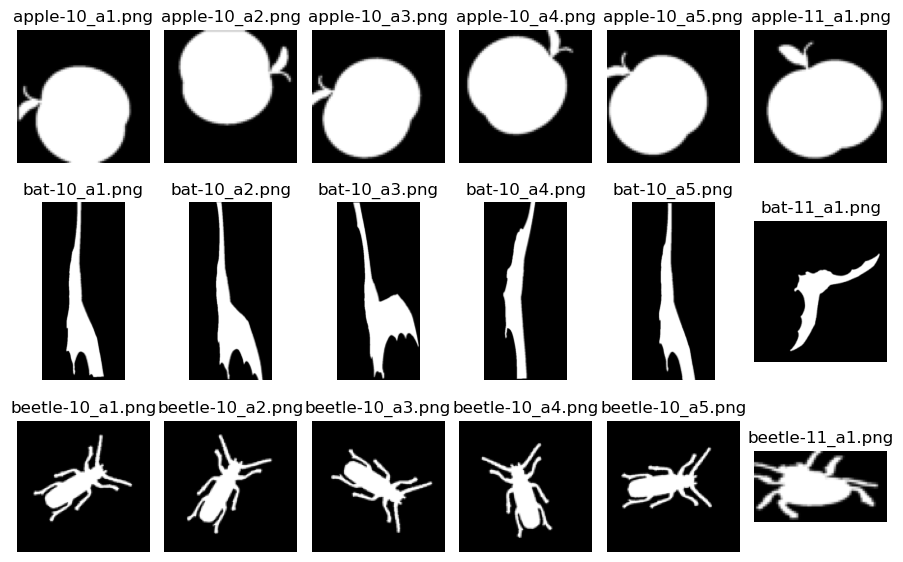

In [16]:
seg_list_temp = seg_list_temp[:18]
filename_list_temp = filename_list_temp[:18]

fig, ax  = plt.subplots(3, 6, figsize=(9, 6))

for i, (image, filename) in enumerate(zip(seg_list_temp, filename_list_temp)):
    ax[i // 6, i % 6].imshow(image, cmap='gray')
    ax[i // 6, i % 6].set_title(str(filename))
    ax[i // 6, i % 6].axis('off')

fig.tight_layout()
plt.show()


In [19]:
# Arranjo 2D para as características e lista de rótulos correspondentes
feature_mat = []
filtered_labels = []  # Para manter apenas os rótulos alinhados às características

for i, (seg_image, label) in enumerate(zip(seg_list, label_list)):
    # Calcula a imagem de rótulos
    im_lbl = measure.label(seg_image)
    
    # Calcula uma lista de propriedades (características) dos objetos na imagem
    props = measure.regionprops(im_lbl)
    
    # Verifica se há exatamente um objeto na imagem
    if len(props) != 1:
        print(f'Imagem {i} - ERRO de segmentação: {len(props)} objetos detectados.')
        continue  # Ignora imagens com problemas de segmentação

    # Extrai as propriedades do objeto
    for prop in props:
        # Prop. 0: Área
        area = prop.area
        # Prop. 1: Maior eixo
        major_axis = prop.major_axis_length
        # Prop. 2: Menor eixo
        minor_axis = prop.minor_axis_length
        # Prop. 3: Solidez
        solidity = prop.solidity
        # Prop. 4: Excentricidade
        eccentricity = prop.eccentricity
        # Monta o vetor de características deste objeto
        feature_list = [area, major_axis, minor_axis, solidity, eccentricity]
    
    # Adiciona as características à matriz e o rótulo correspondente
    feature_mat.append(feature_list)
    filtered_labels.append(label)

# Criar o DataFrame
features = ['area', 'major_axis', 'minor_axis', 'solidity', 'eccentricity']
df = pd.DataFrame(feature_mat, columns=features)
df['class'] = filtered_labels

# Exibir o DataFrame
display(df)


Imagem 0 - ERRO de segmentação: 3 objetos detectados.
Imagem 1 - ERRO de segmentação: 2 objetos detectados.
Imagem 2 - ERRO de segmentação: 3 objetos detectados.
Imagem 3 - ERRO de segmentação: 4 objetos detectados.
Imagem 4 - ERRO de segmentação: 3 objetos detectados.
Imagem 5 - ERRO de segmentação: 2 objetos detectados.
Imagem 6 - ERRO de segmentação: 2 objetos detectados.
Imagem 7 - ERRO de segmentação: 2 objetos detectados.
Imagem 8 - ERRO de segmentação: 2 objetos detectados.
Imagem 9 - ERRO de segmentação: 2 objetos detectados.
Imagem 15 - ERRO de segmentação: 2 objetos detectados.
Imagem 16 - ERRO de segmentação: 2 objetos detectados.
Imagem 17 - ERRO de segmentação: 2 objetos detectados.
Imagem 18 - ERRO de segmentação: 2 objetos detectados.
Imagem 19 - ERRO de segmentação: 2 objetos detectados.
Imagem 20 - ERRO de segmentação: 2 objetos detectados.
Imagem 21 - ERRO de segmentação: 2 objetos detectados.
Imagem 22 - ERRO de segmentação: 2 objetos detectados.
Imagem 23 - ERRO de 

,area,major_axis,minor_axis,solidity,eccentricity,class
0,1789.0,52.178028,44.473707,0.911360,0.522979,apple
1,1756.0,49.418813,46.022550,0.915060,0.364315,apple
2,1798.0,51.921729,44.958187,0.912690,0.500245,apple
3,1762.0,53.254111,42.720270,0.917708,0.597060,apple
4,1738.0,48.481813,46.502838,0.909471,0.282793,apple
...,...,...,...,...,...,...
408,1022.0,130.147253,25.402920,0.333769,0.980766,bone
409,817.0,149.832754,18.182537,0.314352,0.992610,bone
410,986.0,120.140664,25.523218,0.326815,0.977173,bone
411,969.0,125.362114,24.930657,0.324406,0.980026,bone


C:\Users\marcu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marcu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\marcu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\marcu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

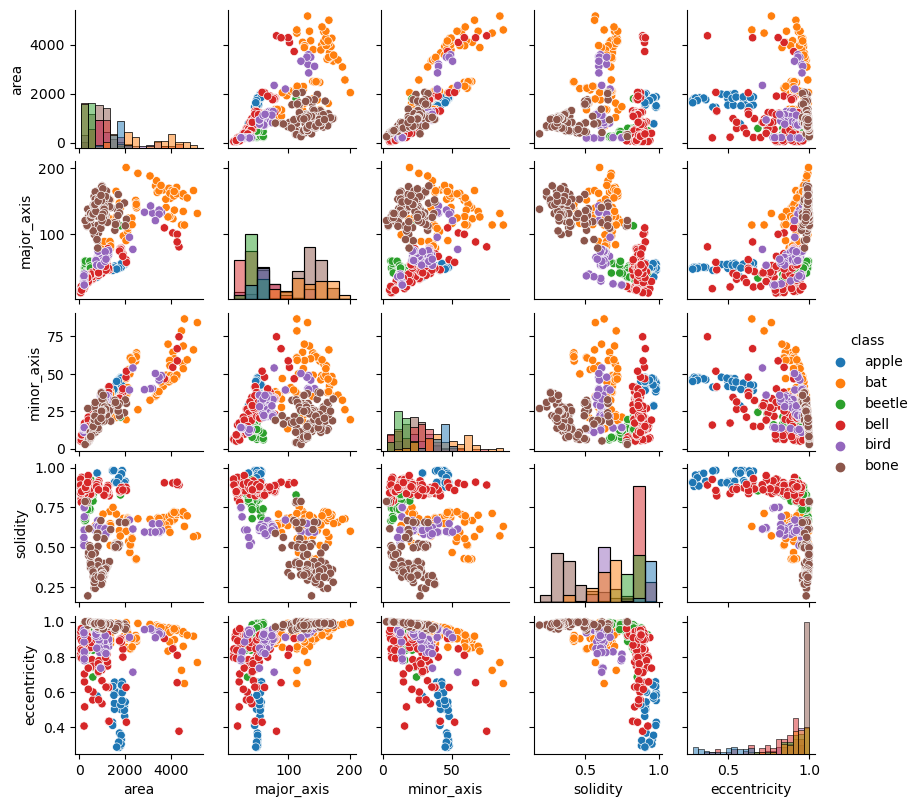

In [20]:
g = sns.PairGrid(df, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [22]:
print(f"Feature Matrix Rows: {len(feature_mat)}, Labels: {len(filtered_labels)}")


Feature Matrix Rows: 413, Labels: 413


In [24]:
import numpy as np

# Converte feature_mat para um array NumPy
feature_mat_np = np.array(feature_mat)

# Seleciona apenas as duas primeiras características (Área e maior eixo)
feature_mat_ok = feature_mat_np[:, 0:2]

# Exibe as características selecionadas
print(feature_mat_ok)


[[1789.           52.17802795]
 [1756.           49.41881258]
 [1798.           51.92172857]
 [1762.           53.2541114 ]
 [1738.           48.48181331]
 [1537.           48.09204783]
 [1532.           48.48080869]
 [1542.           50.22012304]
 [1538.           51.45051381]
 [1968.           54.63593932]
 [1983.           53.77324933]
 [2006.           55.64996189]
 [1966.           54.16376797]
 [1810.           52.92029505]
 [1811.           49.91330291]
 [1815.           50.21860947]
 [1865.           53.33663008]
 [1869.           56.20472337]
 [1871.           54.43978352]
 [1447.           45.12354016]
 [1459.           48.94217043]
 [1454.           45.03180817]
 [1510.           48.59721647]
 [1833.           49.76842233]
 [1831.           49.71996908]
 [1824.           49.83223695]
 [1825.           49.44836033]
 [1843.           55.25286142]
 [ 784.           34.92288902]
 [ 772.           34.8843417 ]
 [1721.           48.15833233]
 [1632.           46.85571838]
 [2209. 

In [26]:
# Separa o conjunto de dados em 'feature_map_ok', de acordo com 'label_list'. 
# 30% das imagens vão para o conjunto de testes.
X_train, X_test, y_train, y_test = model_selection.train_test_split(feature_mat_ok, 
                                                                    filtered_labels, 
                                                                    test_size=0.3, 
                                                                    random_state=42)

In [27]:
# Média das caracteristicas do conjunto de treinamento
X_train_mean = X_train.mean(0)
# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_std = X_train.std(0)

with np.printoptions(precision=4, suppress=True):
    print(X_train.mean(0))
    print(X_train.std(0))

[1235.3356   81.5548]
[1061.8517   47.1919]


In [28]:
# Transformada Normal de Caracteristicas
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std

with np.printoptions(precision=4, suppress=True):
    print(X_train_norm.mean(0))
    print(X_test_norm.mean(0))

[0. 0.]
[0.0999 0.2041]


In [29]:
# Constrói um classificador do tipo K-NN
# K = 3
clf = neighbors.KNeighborsClassifier(n_neighbors=3)

# Treinando o classificador
clf.fit(X_train_norm, y_train)

# Testando o classificador
pred = clf.predict(X_test_norm)

In [30]:
# Acertos
acertos = y_test == pred

print('\n Predição:')
print(pred)
print('\nReal:')
print(y_test)
print('\nAcerto/Erro:')
print(acertos.astype(int))


 Predição:
['bone' 'bone' 'bone' 'bone' 'bell' 'bone' 'bird' 'bell' 'bone' 'apple'
 'bird' 'bat' 'bat' 'bell' 'beetle' 'beetle' 'bat' 'bird' 'bell' 'bone'
 'bat' 'apple' 'bone' 'bone' 'bone' 'bone' 'beetle' 'bird' 'bone' 'beetle'
 'apple' 'bird' 'bell' 'bat' 'bat' 'bone' 'bird' 'bell' 'bell' 'bone'
 'apple' 'bone' 'apple' 'beetle' 'bird' 'bell' 'bone' 'bone' 'bat' 'bone'
 'bell' 'bat' 'bell' 'bone' 'bat' 'bird' 'bat' 'bone' 'bone' 'bat' 'bone'
 'apple' 'bone' 'bell' 'beetle' 'apple' 'bat' 'bat' 'bat' 'bell' 'beetle'
 'bat' 'bone' 'apple' 'apple' 'bell' 'bell' 'apple' 'bird' 'bone' 'bell'
 'bell' 'bone' 'bell' 'apple' 'bat' 'beetle' 'bell' 'bone' 'bone' 'bell'
 'bone' 'apple' 'apple' 'beetle' 'bat' 'bone' 'bone' 'bat' 'bird' 'bell'
 'beetle' 'beetle' 'bone' 'bat' 'bone' 'beetle' 'beetle' 'bird' 'beetle'
 'beetle' 'bell' 'bell' 'bell' 'bone' 'bat' 'beetle' 'bell' 'bat' 'bone'
 'bell' 'apple' 'bat' 'bell']

Real:
['bone', 'bone', 'bone', 'bone', 'bell', 'bone', 'bird', 'bell', 'bone', 'b

In [31]:
print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_test, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_test, pred))


Matriz de confusão:
[[13  0  0  1  0  0]
 [ 0 20  0  1  1  2]
 [ 0  0 14  2  1  0]
 [ 1  0  2 16  0  0]
 [ 0  1  0  6  9  0]
 [ 0  1  0  0  0 33]]

Relatório de classificação:
              precision    recall  f1-score   support

       apple       0.93      0.93      0.93        14
         bat       0.91      0.83      0.87        24
      beetle       0.88      0.82      0.85        17
        bell       0.62      0.84      0.71        19
        bird       0.82      0.56      0.67        16
        bone       0.94      0.97      0.96        34

    accuracy                           0.85       124
   macro avg       0.85      0.83      0.83       124
weighted avg       0.86      0.85      0.85       124

